In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pprint
sns.set(style="white", context='poster')
from sympy import *
import math
init_printing(use_unicode=True)
from scipy.integrate import solve_ivp

In [2]:
%load_ext autoreload
%autoreload 2


In [3]:
from model_equations_separate_NC_sep_vmax import *

In [4]:
import run_sensitivity

In [204]:

HCOLOR = '#ffc58f'
HCOLOR_light = '#ffd2a9'
PCOLOR = '#99cc99'
PCOLOR_light = '#aad5aa'

DONCOLOR = '#7285b7'
RDONCOLOR = 'black' #'#00334D'
DINCOLOR = '#bbdaff' #'#000066'

DOCCOLOR = '#cc6666'
RDOCCOLOR = 'black' #'#00334D'
DICCOLOR = '#ff9da4' #'#000066'

SHCOLOR = '#ffa98f'
SPCOLOR = '#326232'


ccnpalette = [DONCOLOR, RDONCOLOR, DINCOLOR,SPCOLOR, SHCOLOR,PCOLOR, HCOLOR, ]
ccnorder = ['DON', 'RDON', 'DIN', 'Sp', 'Sh', 'Bp', 'Bh', ]
cccpalette = [ SPCOLOR, SHCOLOR, DOCCOLOR, RDOCCOLOR, DICCOLOR, PCOLOR, HCOLOR,]
cccorder = ['Sp[C]', 'Sh[C]', 'DOC', 'RDOC', 'DIC', 'Bp[C]', 'Bh[C]', ]
ccxpalette = [PCOLOR, HCOLOR]
ccxorder = ['Xp', 'Xh']
hnpalette = [ HCOLOR_light, SPCOLOR, SHCOLOR, DONCOLOR, RDONCOLOR, DINCOLOR]
hnorder = [ 'Bh', 'Sp', 'Sh', 'DON', 'RDON', 'DIN']
hcpalette = [ HCOLOR_light, SPCOLOR, SHCOLOR, DOCCOLOR, RDOCCOLOR, DICCOLOR]
hcorder = [ 'Bh[C]', 'Sp[C]', 'Sh[C]', 'DOC', 'RDOC', 'DIC']
pnpalette = [ PCOLOR_light, SPCOLOR, SHCOLOR, DONCOLOR, RDONCOLOR, DINCOLOR]
pnorder = [ 'Bp', 'Sp', 'Sh', 'DON', 'RDON', 'DIN']
pcpalette = [ PCOLOR_light, SPCOLOR, SHCOLOR, DOCCOLOR, RDOCCOLOR, DICCOLOR]
pcorder = [ 'Bp[C]', 'Sp[C]', 'Sh[C]', 'DOC', 'RDOC', 'DIC']
sns.color_palette(ccnpalette + cccpalette, )
# 


In [6]:
refdf = pd.read_csv('prelim_bottle.csv')


In [7]:
dpath = r'C:\Users\wosnat\OneDrive - University of Haifa\Documents\results\recycle_model\res'
import glob

res_glob_pattern = '*_df.csv.gz'
sum_glob_pattern = '*_sum.csv.gz'

sum_df = pd.concat ( [ 
    pd.read_csv(f) for f in glob.glob(os.path.join(dpath,sum_glob_pattern ))
] )
df = pd.concat ( [ 
    pd.read_csv(f) for f in glob.glob(os.path.join(dpath,res_glob_pattern ))
] )



In [8]:
sum_df.shape

In [10]:
sum_df.nsmallest(columns='error', n=10)

,Unnamed: 0,M_h,M_p,gamma^D_p,gamma^D_h,R_p,R_h,E^O_p,E^I_p,E^O_h,...,r0_h,b_p,b_h,run_id,status,h_err,p_err,error,logerror,message
103,0,0.000001,0.000001,0.8,0.8,6.625,6.625,0.000001,0.0,0.0,...,0.000002,0.01,0.01,pse3_K^IN_p_2_h4895258542848259320,0,425.379163,174.527918,599.907081,6.396775,NaN
480,0,0.000001,0.000001,0.8,0.8,6.625,6.625,0.000001,0.0,0.0,...,0.000002,0.01,0.01,pse3_Vmax^IN_h_1_h-7513917998685876004,0,418.814692,185.051998,603.866691,6.403353,NaN
905,0,0.000001,0.000001,0.8,0.8,6.625,6.625,0.000001,0.0,0.0,...,0.000002,0.01,0.01,pse3_K^IN_p_27_h8303337785735256703,0,329.516562,288.502729,618.019290,6.426520,NaN
167,0,0.000001,0.000001,0.8,0.8,6.625,6.625,0.000001,0.0,0.0,...,0.000002,0.01,0.01,pse3_K^IN_p_28_h6408706487068416639,0,326.025796,291.998155,618.023951,6.426527,NaN
931,0,0.000001,0.000001,0.8,0.8,6.625,6.625,0.000001,0.0,0.0,...,0.000002,0.01,0.01,pse3_K^IN_p_29_h-9021463787978602026,0,322.585725,295.731667,618.317392,6.427002,NaN
856,0,0.000001,0.000001,0.8,0.8,6.625,6.625,0.000001,0.0,0.0,...,0.000002,0.01,0.01,pse3_K^IN_p_26_h3376669633427470516,0,333.058218,285.259638,618.317855,6.427003,NaN
397,0,0.000001,0.000001,0.8,0.8,6.625,6.625,0.000001,0.0,0.0,...,0.000002,0.01,0.01,pse3_K^IN_p_25_h-5995858735569454924,0,336.650937,282.274217,618.925154,6.427984,NaN
415,0,0.000001,0.000001,0.8,0.8,6.625,6.625,0.000001,0.0,0.0,...,0.000002,0.01,0.01,pse3_K^IN_p_3_h-2783711916032855757,0,412.799176,206.254928,619.054104,6.428193,NaN
797,0,0.000001,0.000001,0.8,0.8,6.625,6.625,0.000001,0.0,0.0,...,0.000002,0.01,0.01,pse3_K^IN_p_24_h600355963632533181,0,340.294872,279.540699,619.835571,6.429454,NaN
746,0,0.000001,0.000001,0.8,0.8,6.625,6.625,0.000001,0.0,0.0,...,0.000002,0.01,0.01,pse3_K^IN_p_23_h4469759030013230781,0,343.990159,277.040007,621.030167,6.431380,NaN


In [11]:
df.head()

,Unnamed: 0,Bp,Bh,DON,RDON,DIN,DOC,RDOC,DIC,ROS,...,Treleasep,Tbreakdownh,respirationp,respirationh,dic_uptake,Bp[C],Bh[C],Sp[C],Sh[C],run_id
0,0,1.100000,44.000000,20.000000,0.000000,100.000000,132.500000,0.000000,3000.000000,0.000000,...,0.000001,0.000000,0.000002,0.000094,-1.040834e-16,7.287500,291.500000,0.000000e+00,0.0,dm_dis_H_SIGNAL-DETOXIFICATION_h-2223486896452...
1,1,2.607425,40.845408,0.067101,1.699386,119.880680,0.089243,11.258429,3039.546648,0.006760,...,0.000003,0.000003,0.000006,0.000086,-7.579774e-04,17.274193,270.600826,1.915381e-10,0.0,dm_dis_H_SIGNAL-DETOXIFICATION_h-2223486896452...
2,2,10.872281,23.033304,0.150452,3.830199,127.213764,0.729892,25.375067,2993.643595,0.059064,...,0.000011,0.000011,0.000024,0.000049,1.218311e-04,72.028862,152.595640,1.241477e-09,0.0,dm_dis_H_SIGNAL-DETOXIFICATION_h-2223486896452...
3,3,28.337628,23.713945,0.461864,5.496032,107.090531,31.173762,36.411209,2936.554242,0.222593,...,0.000030,0.000028,0.000062,0.000051,1.216044e-03,187.736785,157.104888,3.460480e-09,0.0,dm_dis_H_SIGNAL-DETOXIFICATION_h-2223486896452...
4,4,70.547092,25.920237,3.577099,8.233400,56.822172,231.414696,54.546277,2804.710983,1.428352,...,0.000074,0.000055,0.000154,0.000055,3.743039e-03,467.374487,171.721568,8.828507e-09,0.0,dm_dis_H_SIGNAL-DETOXIFICATION_h-2223486896452...


In [12]:
df.columns

Index(['Unnamed: 0', 'Bp', 'Bh', 'DON', 'RDON', 'DIN', 'DOC', 'RDOC', 'DIC',
       'ROS', 'Sp', 'Sh', 't', 'day', 'Xp', 'Xh', 'limINp', 'limONp', 'limICp',
       'limOCp', 'limINh', 'limONh', 'limICh', 'limOCh', 'gross_uptakeINp',
       'gross_uptakeONp', 'gross_uptakeICp', 'gross_uptakeOCp',
       'gross_uptakeINh', 'gross_uptakeONh', 'gross_uptakeICh',
       'gross_uptakeOCh', 'actual_uptakeNp', 'actual_uptakeNh', 'overflowNp',
       'overflowCp', 'overflowNh', 'overflowCh', 'deathp', 'deathh',
       'exudationOp', 'exudationIp', 'exudationOh', 'exudationIh', 'Treleasep',
       'Tbreakdownh', 'respirationp', 'respirationh', 'dic_uptake', 'Bp[C]',
       'Bh[C]', 'Sp[C]', 'Sh[C]', 'run_id'],
      dtype='object')

In [13]:
mdf = df.melt(id_vars=['run_id', 'day', 't'], value_vars=ccxorder+ccnorder+cccorder)

In [167]:
neg_ids = mdf.loc[mdf.value<0, 'run_id']
mdf = mdf.loc[~mdf.run_id.isin(neg_ids)]
df = df.loc[~df.run_id.isin(neg_ids)]
sum_df = sum_df.loc[~sum_df.run_id.isin(neg_ids)]


C:\Users\wosnat\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\wosnat\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\wosnat\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

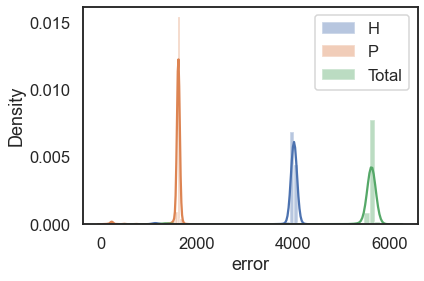

In [173]:
sns.distplot(sum_df.h_err, label='H')
sns.distplot(sum_df.p_err, label='P')
sns.distplot(sum_df.error, label='Total')
plt.legend()


In [168]:
lowest_ids = sum_df.nsmallest(columns='error', n=10)['run_id']

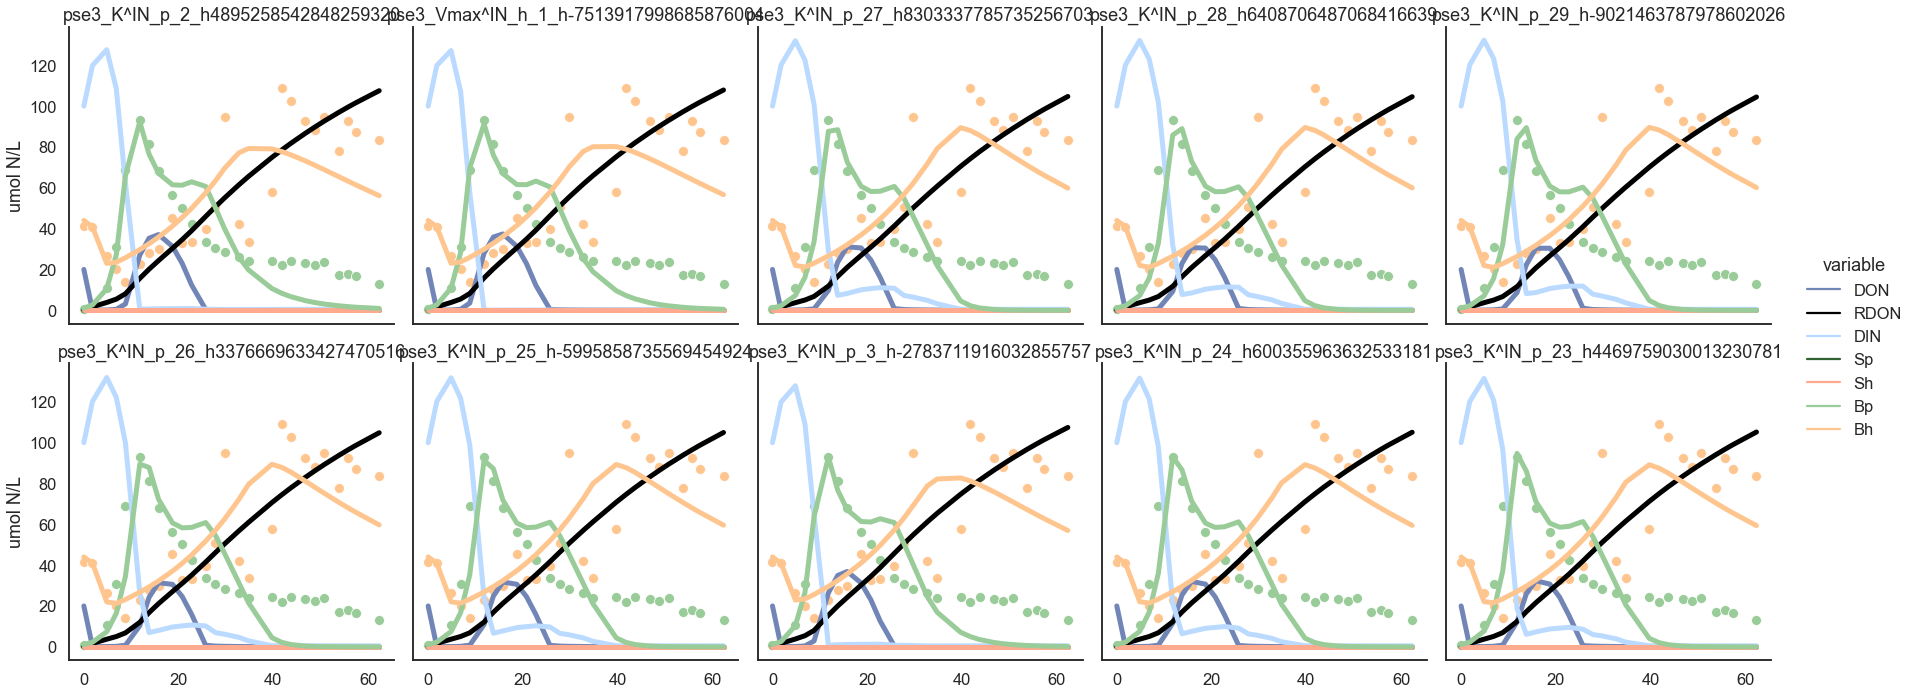

In [169]:
g = sns.relplot(
    data=mdf.loc[mdf.variable.isin(ccnorder) & mdf.run_id.isin(lowest_ids)], 
    x='day', y='value',
    hue='variable', hue_order=ccnorder, palette=ccnpalette,
    #estimator=None, units='run_id',
    col='run_id', col_order=lowest_ids, col_wrap=5,
    kind='line', lw=5,
)


def pp(**kwargs):
    
    # get a reference to the currently active axes
    ax = plt.gca()    
    sns.scatterplot(data=refdf, x='day', y='cc Bp[N]', ax=ax, s=100, legend=False, color=PCOLOR)
    sns.scatterplot(data=refdf, x='day', y='cc Bh[N]', ax=ax, s=100, legend=False, color=HCOLOR)

g.map(pp)
g.set(ylabel='umol N/L')
g.set_titles(col_template='{col_name}',)



In [171]:
lowest_ids


103        pse3_K^IN_p_2_h4895258542848259320
480    pse3_Vmax^IN_h_1_h-7513917998685876004
905       pse3_K^IN_p_27_h8303337785735256703
167       pse3_K^IN_p_28_h6408706487068416639
931      pse3_K^IN_p_29_h-9021463787978602026
856       pse3_K^IN_p_26_h3376669633427470516
397      pse3_K^IN_p_25_h-5995858735569454924
415       pse3_K^IN_p_3_h-2783711916032855757
797        pse3_K^IN_p_24_h600355963632533181
746       pse3_K^IN_p_23_h4469759030013230781
Name: run_id, dtype: object

In [172]:
sum_df.nlargest(10, 'error', )

,Unnamed: 0,M_h,M_p,gamma^D_p,gamma^D_h,R_p,R_h,E^O_p,E^I_p,E^O_h,...,r0_h,b_p,b_h,run_id,status,h_err,p_err,error,logerror,message
14159,0,8.414940e-06,0.000004,0.970215,0.952637,6.625,6.625,0.000002,0.000009,5.538940e-06,...,0.000002,0.01,0.01,se3_62454_h-1633796639134140394,0,4038.840977,1978.229369,6017.070345,8.702356,NaN
27381,0,5.594889e-07,0.000003,0.616699,0.126465,6.625,6.625,0.000010,0.000006,4.460653e-06,...,0.000002,0.01,0.01,se3_44337_h-8720869702070549201,0,4435.204356,1576.594103,6011.798459,8.701479,NaN
15139,0,8.934869e-06,0.000011,0.941895,0.916504,6.625,6.625,0.000003,0.000002,5.849202e-07,...,0.000002,0.01,0.01,se3_20056_h3763018109382059600,0,4342.216072,1588.184716,5930.400788,8.687847,NaN
4088,0,3.780789e-06,0.000003,0.616699,0.929199,6.625,6.625,0.000010,0.000006,4.460653e-06,...,0.000002,0.01,0.01,se3_44340_h-3215610268660428645,0,4347.726655,1555.912682,5903.639337,8.683324,NaN
12002,0,8.414940e-06,0.000004,0.970215,0.952637,6.625,6.625,0.000002,0.000009,5.538940e-06,...,0.000002,0.01,0.01,se3_62437_h-5732149225323766357,0,4039.528237,1855.025149,5894.553386,8.681784,NaN
4230,0,1.864963e-07,0.000005,0.696777,0.179199,6.625,6.625,0.000005,0.000006,5.620321e-06,...,0.000002,0.01,0.01,se3_65297_h-4446808166635628833,0,4300.891882,1591.307616,5892.199498,8.681385,NaN
8377,0,1.864963e-07,0.000005,0.696777,0.179199,6.625,6.625,0.000008,0.000006,5.620321e-06,...,0.000002,0.01,0.01,se3_65285_h-3879499400429310933,0,4290.932814,1591.258784,5882.191598,8.679685,NaN
17884,0,1.015557e-05,0.000009,0.651855,0.880371,6.625,6.625,0.000001,0.000009,2.629598e-06,...,0.000002,0.01,0.01,se3_35173_h-2809708484828440780,0,4285.687071,1594.232886,5879.919956,8.679298,NaN
6685,0,1.864963e-07,0.000005,0.696777,0.179199,6.625,6.625,0.000005,0.000006,5.620321e-06,...,0.000002,0.01,0.01,se3_65313_h1191914282967978961,0,4279.996233,1592.431189,5872.427422,8.678023,NaN
26990,0,1.864963e-07,0.000005,0.696777,0.179199,6.625,6.625,0.000005,0.000006,5.620321e-06,...,0.000002,0.01,0.01,se3_65302_h-6020802703331635752,0,4276.401936,1594.136913,5870.538848,8.677702,NaN


In [19]:
sum_df.nsmallest(columns='error', n=1).T

,103
Unnamed: 0,0
M_h,0.000001
M_p,0.000001
gamma^D_p,0.8
gamma^D_h,0.8
R_p,6.625
R_h,6.625
E^O_p,0.000001
E^I_p,0.0
E^O_h,0.0


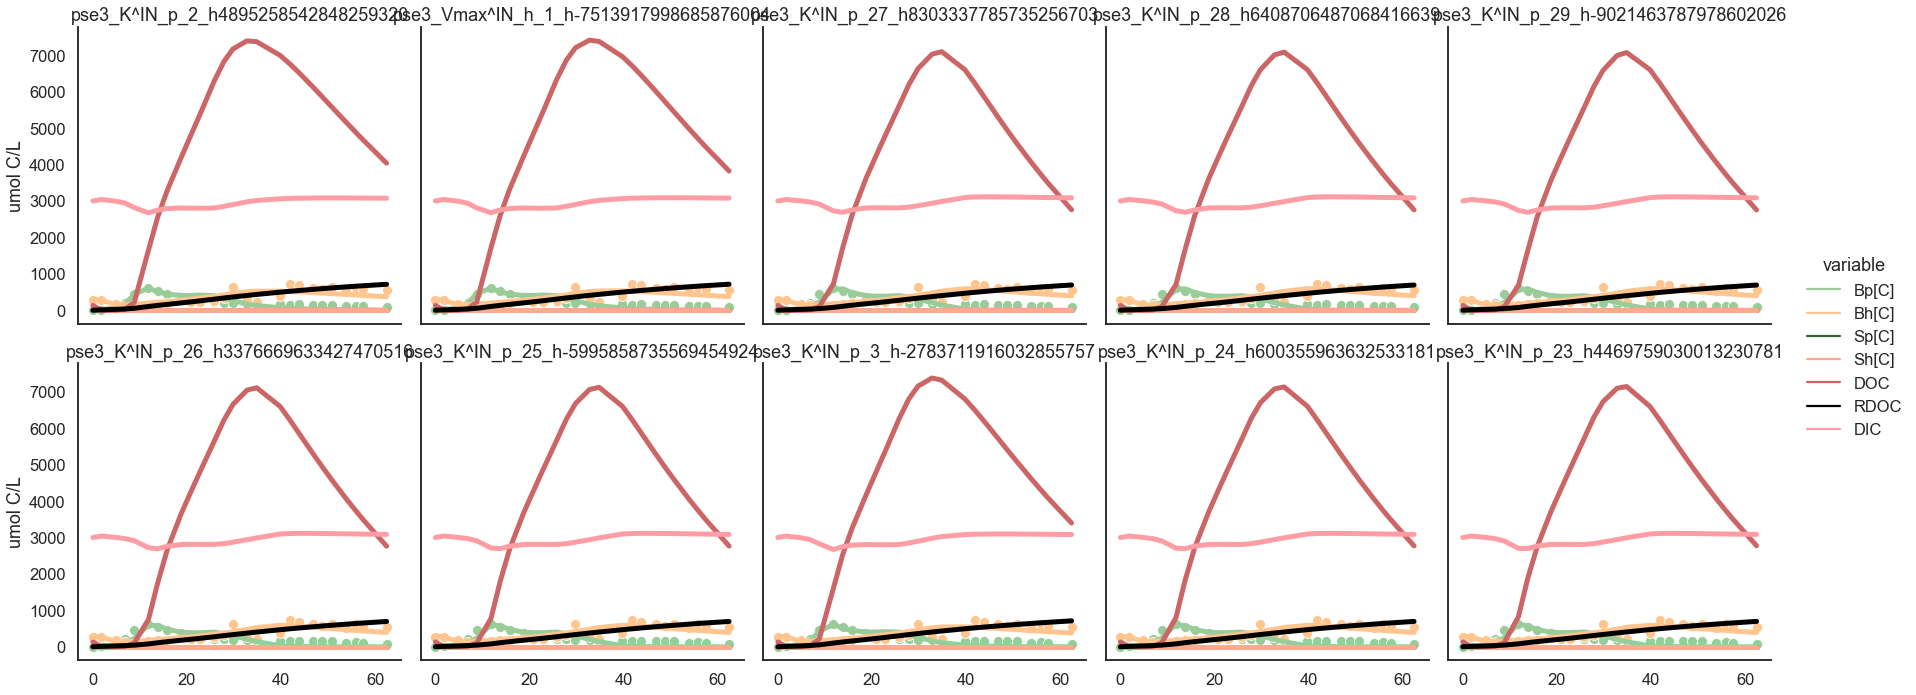

In [174]:
g = sns.relplot(
    data=mdf.loc[mdf.variable.isin(cccorder) & mdf.run_id.isin(lowest_ids)], 
    x='day', y='value',
    hue='variable', hue_order=cccorder, palette=cccpalette,
    #estimator=None, units='run_id',
    col='run_id', col_order=lowest_ids, col_wrap=5,
    kind='line', lw=5,
)


def pp(**kwargs):
    
    # get a reference to the currently active axes
    ax = plt.gca()    
    sns.scatterplot(data=refdf, x='day', y='cc Bp[C]', ax=ax, s=100, legend=False, color=PCOLOR)
    sns.scatterplot(data=refdf, x='day', y='cc Bh[C]', ax=ax, s=100, legend=False, color=HCOLOR)

g.map(pp)
g.set(ylabel='umol C/L')
g.set_titles(col_template='{col_name}',)



In [175]:
df.shape

In [176]:
import hdbscan


In [177]:
import umap

In [178]:
sample_cols = ['Bp', 'Bh', 'DON', 'DIN', 'RDON', 'DOC', 'DIC', 'RDOC']

sample_days = [ 5., 12., 16., 30., 44., 62.]

tdf = mdf.loc[mdf.day.round(0).isin(sample_days) & mdf.variable.isin(sample_cols)]

In [179]:
tdf['day0'] = tdf.day.round(0)
X = tdf.pivot(index='run_id', columns=['variable', 'day0'], values=['value'])

C:\Users\wosnat\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [181]:
reducer = umap.UMAP(random_state=42)
umap_embedding = reducer.fit_transform(X)

In [182]:
udf = pd.DataFrame(data=umap_embedding, columns=['UMAP1','UMAP2'])

In [183]:
udf['run_id'] = X.index

In [184]:
udf = pd.merge(udf, sum_df, on='run_id', how='left')

In [185]:
udf['logerror'] = np.log(udf['error'])

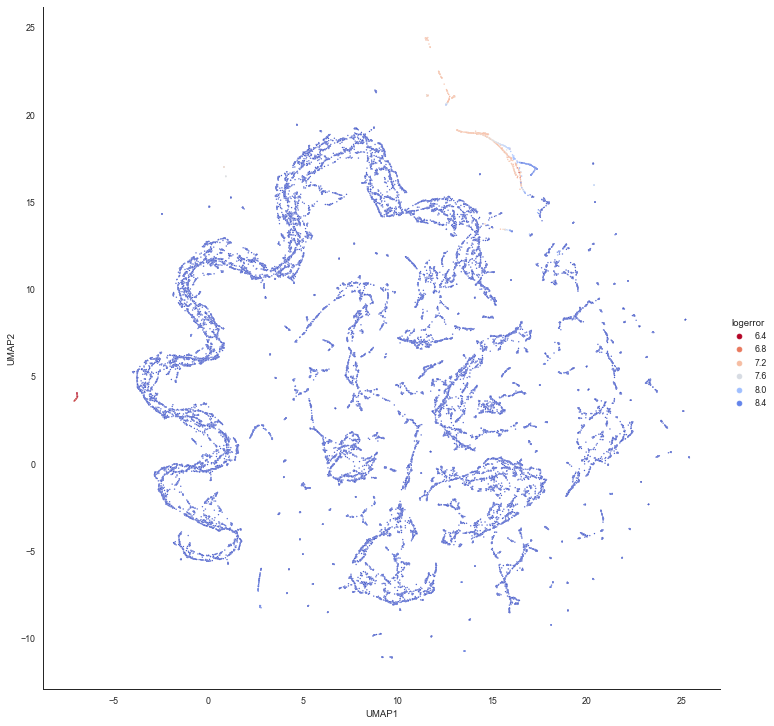

In [186]:
sns.set_context('paper')
sns.relplot(data=udf, x='UMAP1', y='UMAP2', hue='logerror', s=2, height=10, aspect=1, palette='coolwarm_r')

In [187]:
clusterer = hdbscan.HDBSCAN(
    min_cluster_size=500, 
    min_samples=15, 
    core_dist_n_jobs=1, 
    #cluster_selection_epsilon = 20.0,
    #cluster_selection_method='leaf'
)
clusterer.fit(X)


HDBSCAN(core_dist_n_jobs=1, min_cluster_size=500, min_samples=15)

In [188]:
clusterer.labels_

array([ 0, -1,  0, ..., -1,  1,  5], dtype=int64)

In [189]:
clusterer.labels_.max()

5

In [190]:
(clusterer.labels_ < 0).sum()

14782

In [191]:
udf.shape

In [192]:
udf['cluster'] = clusterer.labels_

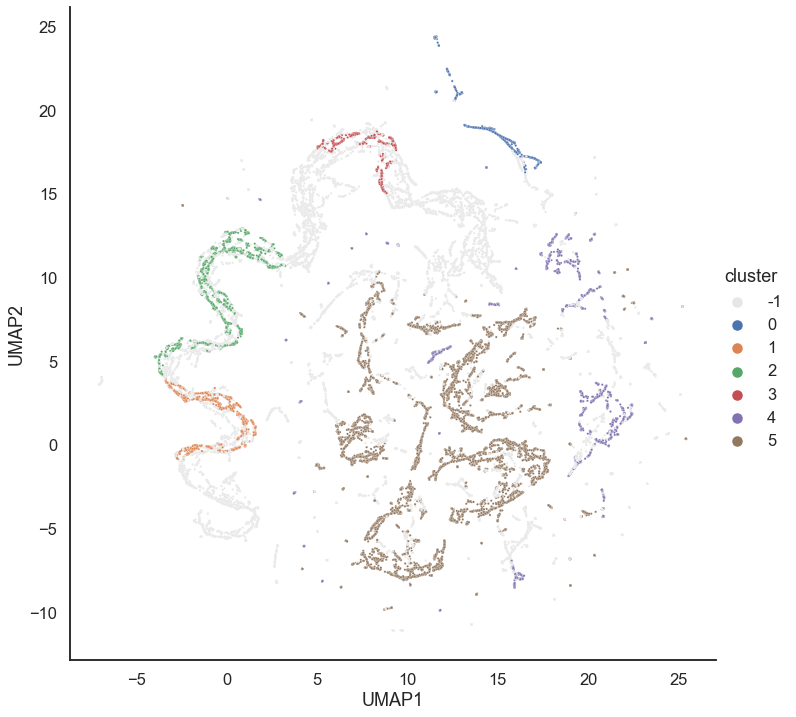

In [193]:
sns.set_context('talk')
cpalette=[(0.9,0.9,0.9),] +sns.color_palette('deep', clusterer.labels_.max()+1)

sns.relplot(data=udf, x='UMAP1', y='UMAP2', hue='cluster', s=5, 
            height=10, aspect=1, palette=cpalette, #size='error',
            legend='full')

<AxesSubplot:ylabel='$\\lambda$ value'>

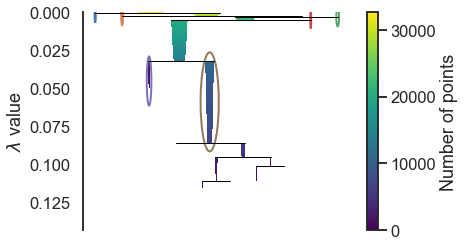

In [194]:
clusterer.condensed_tree_.plot(select_clusters=True,
                               selection_palette=cpalette[1:])

In [195]:
udf.groupby('cluster')['error'].describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
-1,14627.0,5549.904549,491.311568,599.907081,5593.358139,5616.731637,5646.714573,6017.070345
0,712.0,1973.323896,1156.769560,811.640793,1356.432400,1357.147261,2084.341388,4813.812158
1,1103.0,5633.259013,27.439913,5534.979842,5615.216778,5633.316287,5650.699394,5854.358358
2,1656.0,5629.310028,28.149233,5526.867619,5609.865143,5627.188883,5643.240218,5820.467229
3,564.0,5627.853643,30.058036,5582.937283,5608.418266,5618.841888,5640.502668,5796.613066
4,2752.0,5645.186094,25.621657,5302.337641,5634.872004,5650.962959,5662.229900,5744.266472
5,10889.0,5613.304487,27.225734,5501.082505,5600.192865,5610.343912,5627.528444,5834.090191


In [42]:
udf.head()

,UMAP1,UMAP2,run_id,Unnamed: 0,M_h,M_p,gamma^D_p,gamma^D_h,R_p,R_h,...,r0_h,b_p,b_h,status,h_err,p_err,error,logerror,message,cluster
0,18.393744,19.617411,dm_dis_0_h-8039019567827060424,0.0,0.000001,0.000001,0.8,0.8,6.625,6.625,...,0.000002,0.01,0.01,0.0,1136.607016,220.540245,1357.147261,7.213140,NaN,0
1,15.094189,17.837879,dm_dis_COMPETITION_h6394005365336897257,0.0,0.000001,0.000001,0.8,0.8,6.625,6.625,...,0.000002,0.01,0.01,0.0,1451.974484,480.902481,1932.876965,7.566765,NaN,-1
2,14.087950,17.749130,dm_dis_DETOXIFICATION-COMPETITION_h-6700520004...,0.0,0.000001,0.000001,0.8,0.8,6.625,6.625,...,0.000002,0.01,0.01,0.0,1452.341408,482.360833,1934.702241,7.567709,NaN,-1
3,11.688283,16.380659,dm_dis_DETOXIFICATION-H_EXUDATION_h73073427789...,0.0,0.000001,0.000001,0.8,0.8,6.625,6.625,...,0.000002,0.01,0.01,0.0,1409.784340,65.858215,1475.642555,7.296849,NaN,0
4,11.889791,18.805195,dm_dis_DETOXIFICATION-H_OVERFLOW_h753692023304...,0.0,0.000001,0.000001,0.8,0.8,6.625,6.625,...,0.000002,0.01,0.01,0.0,1048.860869,229.824303,1278.685172,7.153588,NaN,0


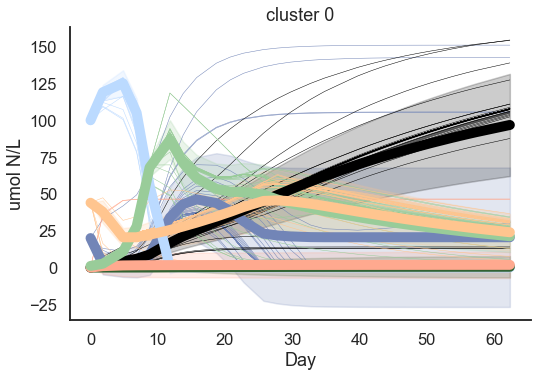

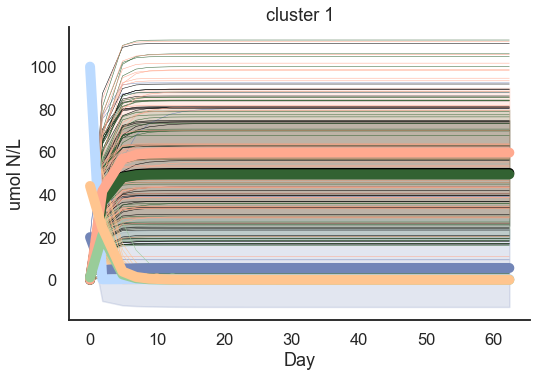

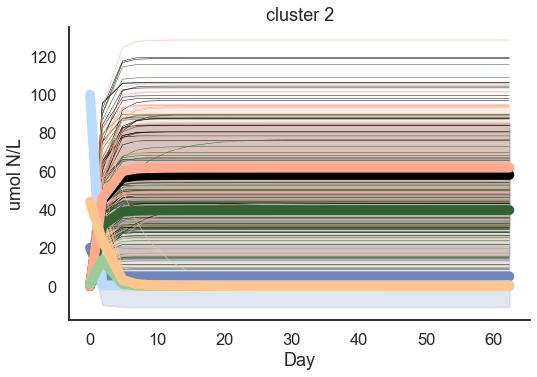

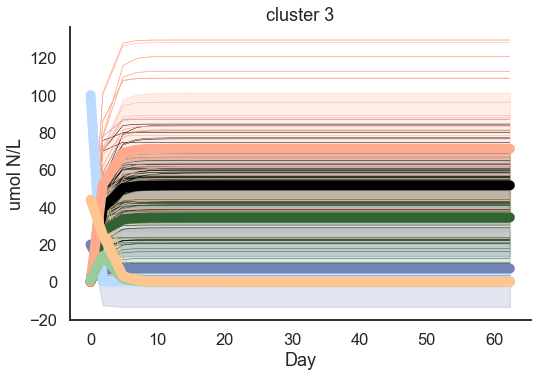

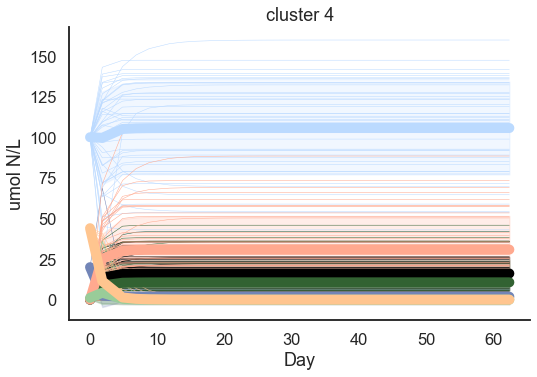

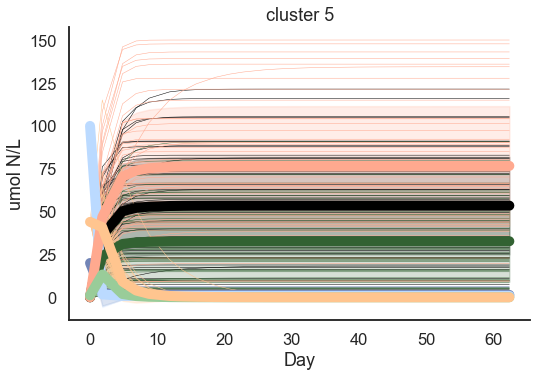

In [196]:
mdf2 = df.melt(id_vars=['run_id', 'day', 't'], value_vars=ccnorder+cccorder)                            
mdf2['Day'] =mdf2['day'].round(5)
                            
def pp(**kwargs):
    
    # get a reference to the currently active axes
    ax = plt.gca()    
    sns.scatterplot(data=refdf, x='day', y='cc Bp[N]', ax=ax, s=100, legend=False, color=PCOLOR)
    sns.scatterplot(data=refdf, x='day', y='cc Bh[N]', ax=ax, s=100, legend=False, color=HCOLOR)


for i in range(0,clusterer.labels_.max()+1):
    ids = list(udf.loc[udf.cluster==i, 'run_id'].sample(50))
    all_ids = list(udf.loc[udf.cluster==i, 'run_id'])
    tdf = mdf2.loc[mdf2.variable.isin(ccnorder) & mdf2.run_id.isin(ids)]
    atdf = mdf2.loc[mdf2.variable.isin(ccnorder) & mdf2.run_id.isin(all_ids)]
    g = sns.relplot(
        data=tdf, 
        x='Day', y='value',
        hue='variable', hue_order=ccnorder, palette=ccnpalette,
        estimator=None, units='run_id',
        #col='run_id', col_order=ids, col_wrap=5,
        kind='line', lw=0.5,
        aspect=1.5, legend=False,
    )
    sns.lineplot(data=atdf,
        x='Day', y='value',
        hue='variable', hue_order=ccnorder, palette=ccnpalette, legend=False, lw=10,ci='sd',
                 #ls='--',
    )


    #g.map(pp)
    #g.map_dataframe(pp2)

    g.set(ylabel='umol N/L', title=f'cluster {i}')
    g.set_titles(col_template='{col_name}',)


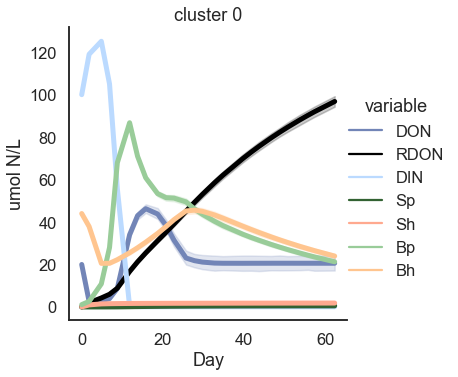

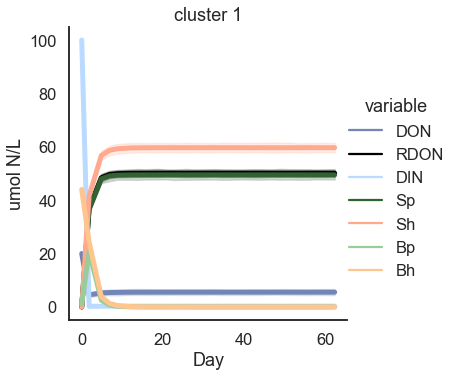

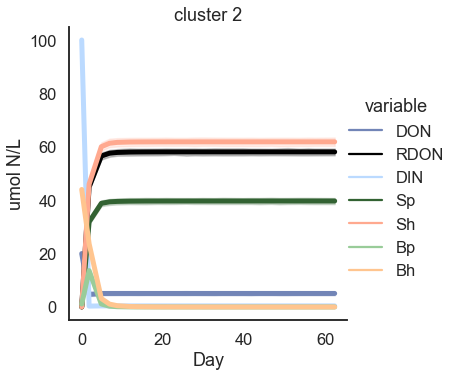

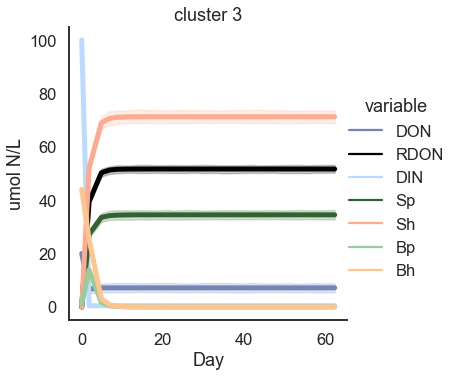

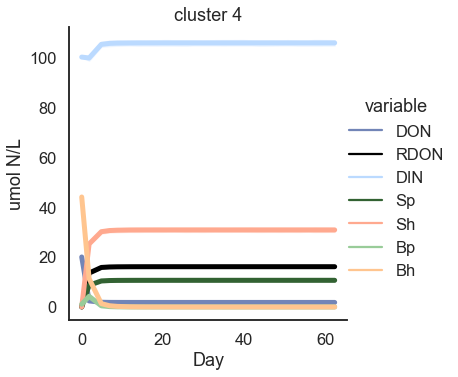

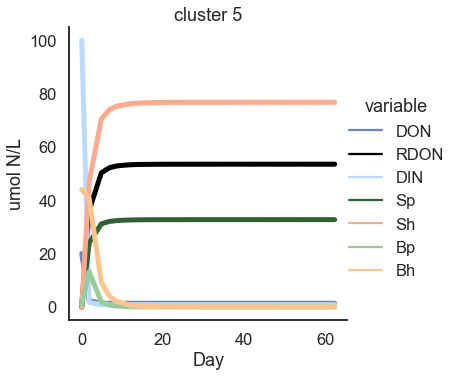

In [198]:
mdf2 = df.melt(id_vars=['run_id', 'day', 't'], value_vars=ccnorder+cccorder)                            
mdf2['Day'] =mdf2['day'].round(5)
                            
def pp(**kwargs):
    
    # get a reference to the currently active axes
    ax = plt.gca()    
    sns.scatterplot(data=refdf, x='day', y='cc Bp[N]', ax=ax, s=100, legend=False, color=PCOLOR)
    sns.scatterplot(data=refdf, x='day', y='cc Bh[N]', ax=ax, s=100, legend=False, color=HCOLOR)


for i in range(0,clusterer.labels_.max()+1):
    ids = list(udf.loc[udf.cluster==i, 'run_id'].sample(50))
    all_ids = list(udf.loc[udf.cluster==i, 'run_id'])
    tdf = mdf2.loc[mdf2.variable.isin(ccnorder) & mdf2.run_id.isin(ids)]
    atdf = mdf2.loc[mdf2.variable.isin(ccnorder) & mdf2.run_id.isin(all_ids)]
#     g = sns.relplot(
#         data=tdf, 
#         x='Day', y='value',
#         hue='variable', hue_order=ccnorder, palette=ccnpalette,
#         estimator=None, units='run_id',
#         #col='run_id', col_order=ids, col_wrap=5,
#         kind='line', lw=0.5,
#         aspect=1.5, legend=False,
#     )
    g = sns.relplot(data=atdf,
        x='Day', y='value',
                    kind='line',
        hue='variable', hue_order=ccnorder, palette=ccnpalette, #legend=False, 
                     lw=5,#ci='sd',
                 #ls='--',
    )


    #g.map(pp)
    #g.map_dataframe(pp2)

    g.set(ylabel='umol N/L', title=f'cluster {i}')
    #g.set_titles(col_template='{col_name}',)
    plt.show()


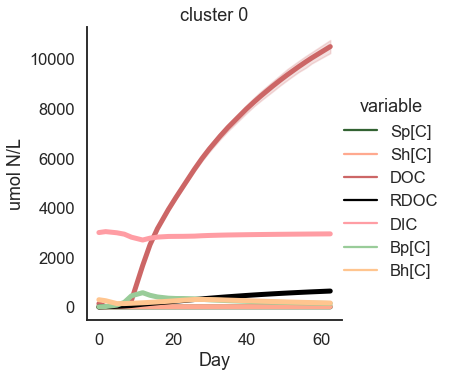

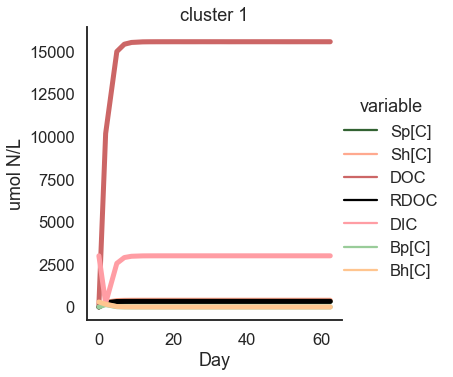

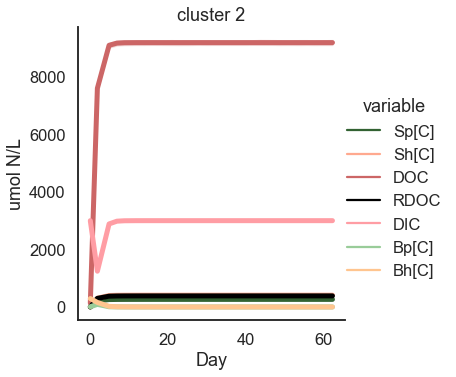

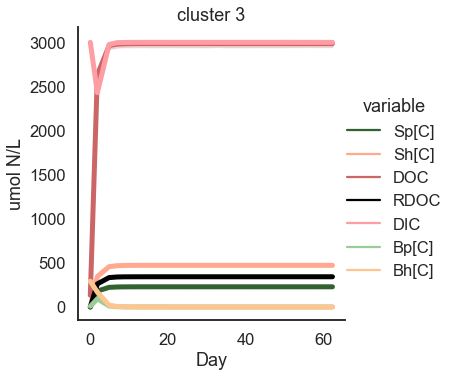

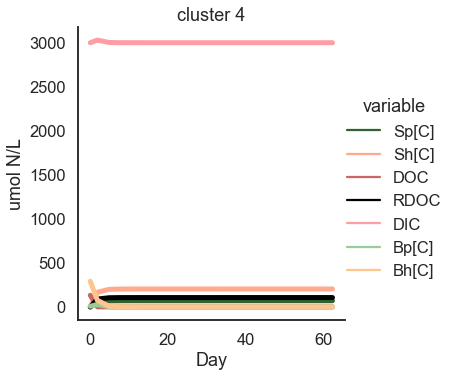

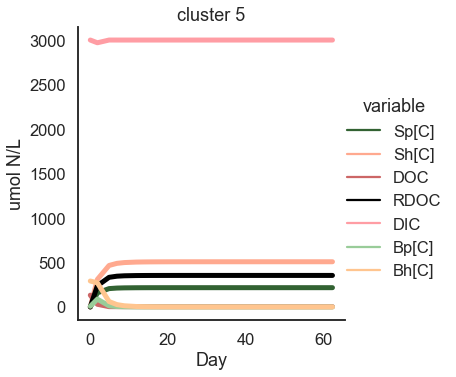

In [206]:
mdf2 = df.melt(id_vars=['run_id', 'day', 't'], value_vars=ccnorder+cccorder)                            
mdf2['Day'] =mdf2['day'].round(5)
                            
def pp(**kwargs):
    
    # get a reference to the currently active axes
    ax = plt.gca()    
    sns.scatterplot(data=refdf, x='day', y='cc Bp[N]', ax=ax, s=100, legend=False, color=PCOLOR)
    sns.scatterplot(data=refdf, x='day', y='cc Bh[N]', ax=ax, s=100, legend=False, color=HCOLOR)


for i in range(0,clusterer.labels_.max()+1):
    ids = list(udf.loc[udf.cluster==i, 'run_id'].sample(50))
    all_ids = list(udf.loc[udf.cluster==i, 'run_id'])
    tdf = mdf2.loc[mdf2.variable.isin(cccorder) & mdf2.run_id.isin(ids)]
    atdf = mdf2.loc[mdf2.variable.isin(cccorder) & mdf2.run_id.isin(all_ids)]
#     g = sns.relplot(
#         data=tdf, 
#         x='Day', y='value',
#         hue='variable', hue_order=ccnorder, palette=ccnpalette,
#         estimator=None, units='run_id',
#         #col='run_id', col_order=ids, col_wrap=5,
#         kind='line', lw=0.5,
#         aspect=1.5, legend=False,
#     )
    g = sns.relplot(data=atdf,
        x='Day', y='value',
                    kind='line',
        hue='variable', hue_order=cccorder, palette=cccpalette, #legend=False, 
                     lw=5,#ci='sd',
                 #ls='--',
    )


    #g.map(pp)
    #g.map_dataframe(pp2)

    g.set(ylabel='umol N/L', title=f'cluster {i}')
    #g.set_titles(col_template='{col_name}',)
    plt.show()


In [200]:
udf['type'] = udf.run_id.str.replace('_.*','', regex=True)

In [203]:
udf.groupby(['type', 'cluster'])['run_id'].count()

type  cluster
dm    -1            27
       0            40
pse3  -1           207
       0           672
       4            52
se3   -1         14548
       1          1109
       2          1673
       3           569
       4          2740
       5         11019
Name: run_id, dtype: int64

<AxesSubplot:xlabel='Day', ylabel='value'>

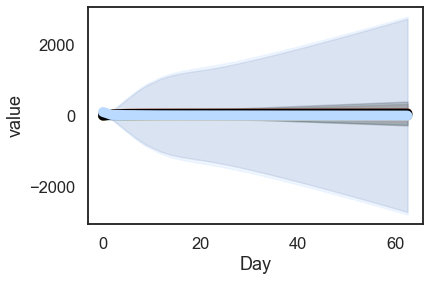

In [44]:
    sns.lineplot(data=mdf2,
        x='Day', y='value',
        hue='variable', hue_order=ccnorder, palette=ccnpalette, legend=False, lw=10,ci='sd',
                 #ls='--',
    )


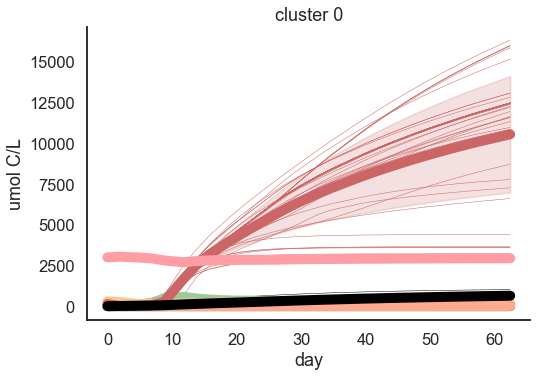

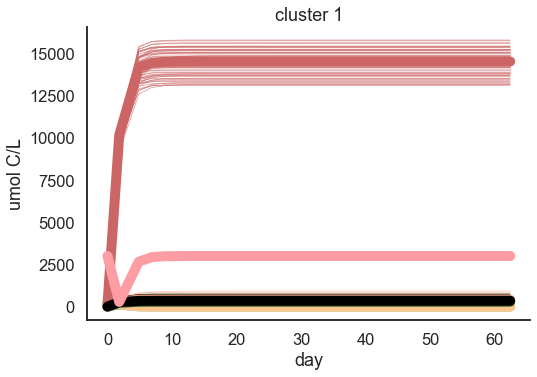

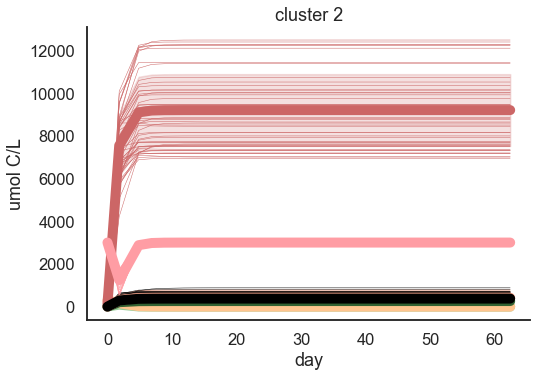

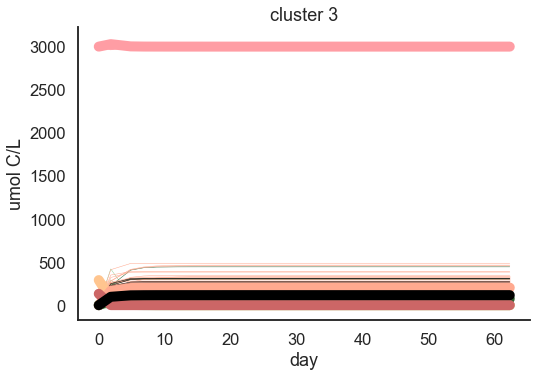

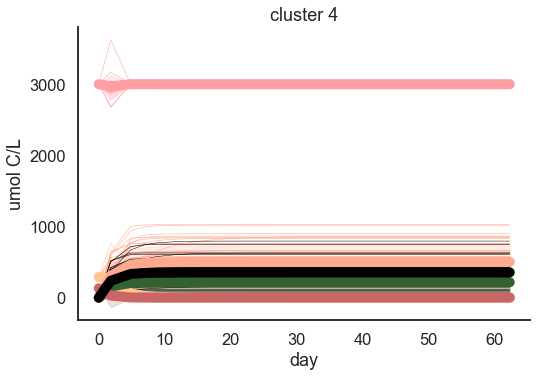

In [45]:
def pp(**kwargs):
    
    # get a reference to the currently active axes
    ax = plt.gca()    
    sns.scatterplot(data=refdf, x='day', y='cc Bp[C]', ax=ax, s=100, legend=False, color=PCOLOR)
    sns.scatterplot(data=refdf, x='day', y='cc Bh[C]', ax=ax, s=100, legend=False, color=HCOLOR)




for i in range(0,clusterer.labels_.max()+1):
    ids = list(udf.loc[udf.cluster==i, 'run_id'].sample(50))
    all_ids = list(udf.loc[udf.cluster==i, 'run_id'])
    tdf = mdf2.loc[mdf2.variable.isin(cccorder) & mdf2.run_id.isin(ids)]
    atdf = mdf2.loc[mdf2.variable.isin(cccorder) & mdf2.run_id.isin(all_ids)]
    g = sns.relplot(
        data=tdf, 
        x='Day', y='value',
        hue='variable', hue_order=cccorder, palette=cccpalette,
        estimator=None, units='run_id',
        #col='run_id', col_order=ids, col_wrap=5,
        kind='line', lw=0.5,
        aspect=1.5, legend=False,
    )
    sns.lineplot(data=atdf,
        x='Day', y='value',
        hue='variable', hue_order=cccorder, palette=cccpalette, legend=False, lw=10, ci='sd'
    )


    #g.map(pp)
    #g.map_dataframe(pp2)

    g.set(ylabel='umol C/L', xlabel='day', title=f'cluster {i}')
    g.set_titles(col_template='{col_name}',)


In [46]:
udf.head()

,UMAP1,UMAP2,run_id,Unnamed: 0,M_h,M_p,gamma^D_p,gamma^D_h,R_p,R_h,...,r0_h,b_p,b_h,status,h_err,p_err,error,logerror,message,cluster
0,18.393744,19.617411,dm_dis_0_h-8039019567827060424,0.0,0.000001,0.000001,0.8,0.8,6.625,6.625,...,0.000002,0.01,0.01,0.0,1136.607016,220.540245,1357.147261,7.213140,NaN,0
1,15.094189,17.837879,dm_dis_COMPETITION_h6394005365336897257,0.0,0.000001,0.000001,0.8,0.8,6.625,6.625,...,0.000002,0.01,0.01,0.0,1451.974484,480.902481,1932.876965,7.566765,NaN,-1
2,14.087950,17.749130,dm_dis_DETOXIFICATION-COMPETITION_h-6700520004...,0.0,0.000001,0.000001,0.8,0.8,6.625,6.625,...,0.000002,0.01,0.01,0.0,1452.341408,482.360833,1934.702241,7.567709,NaN,-1
3,11.688283,16.380659,dm_dis_DETOXIFICATION-H_EXUDATION_h73073427789...,0.0,0.000001,0.000001,0.8,0.8,6.625,6.625,...,0.000002,0.01,0.01,0.0,1409.784340,65.858215,1475.642555,7.296849,NaN,0
4,11.889791,18.805195,dm_dis_DETOXIFICATION-H_OVERFLOW_h753692023304...,0.0,0.000001,0.000001,0.8,0.8,6.625,6.625,...,0.000002,0.01,0.01,0.0,1048.860869,229.824303,1278.685172,7.153588,NaN,0


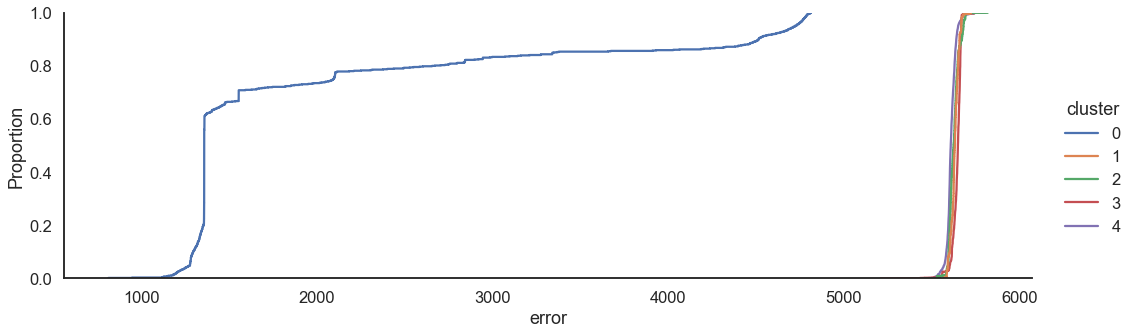

In [47]:
sns.displot(data=udf.loc[udf.cluster>=0], 
            x='error', hue='cluster', palette=cpalette[1:], aspect=3, kind='ecdf')

In [48]:
cols_to_lookat = ['M_h', 'M_p', 'gamma^D_p', 'gamma^D_h', 
       'E^O_p', 'E^I_h', 
       'Vmax^IN_p',  'Vmax^IC_p', 'Vmax^ON_h', 'Vmax^IN_h',
       'Vmax^OC_h',  'epsilon', 'VTmax', 'omega']

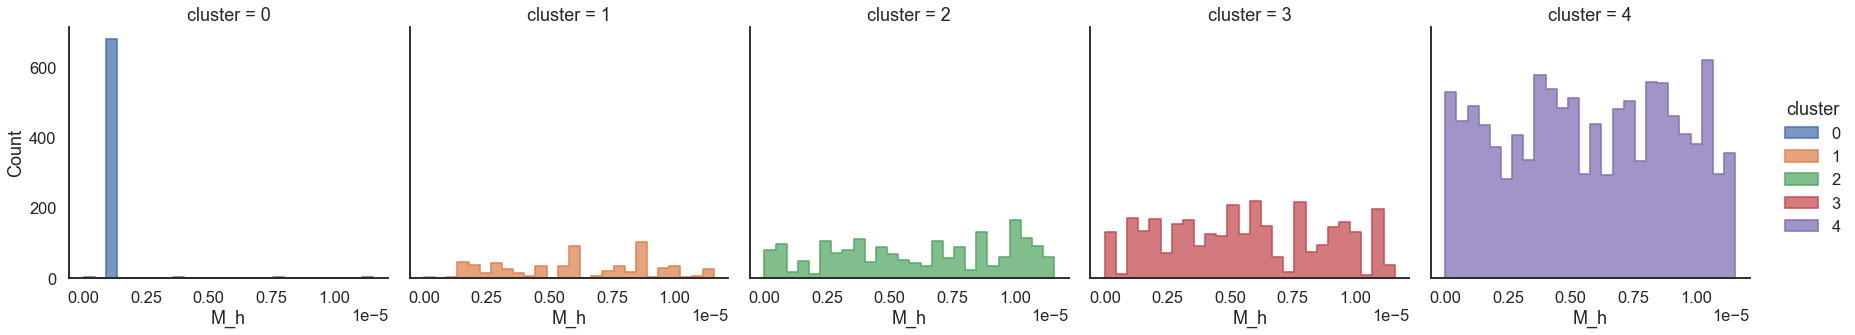

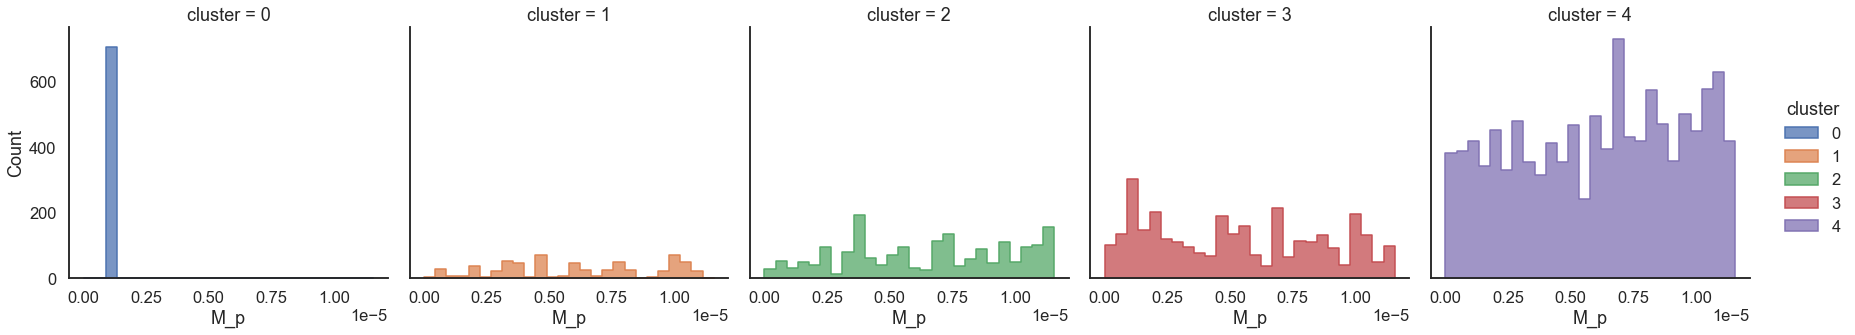

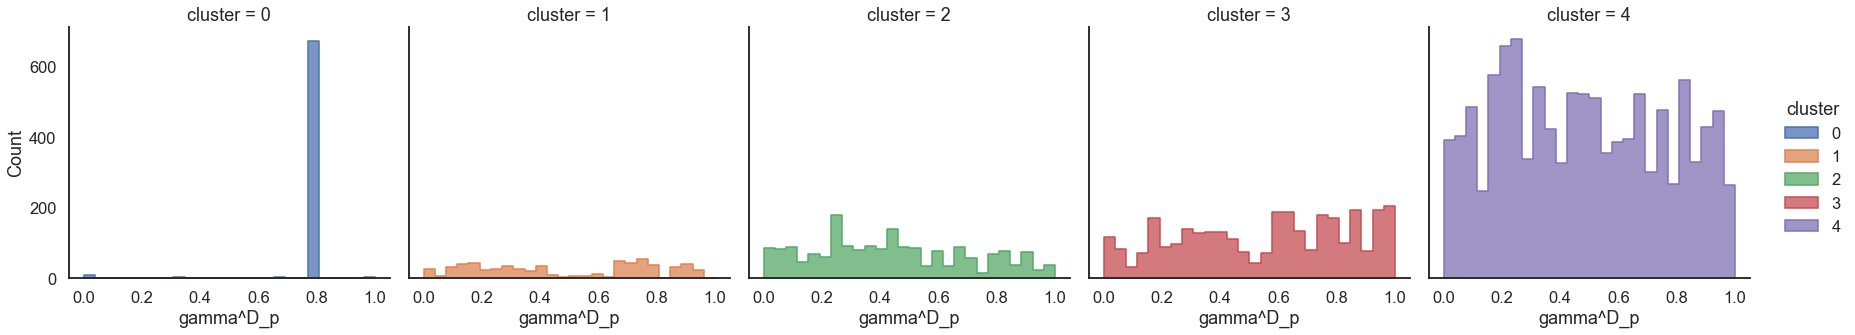

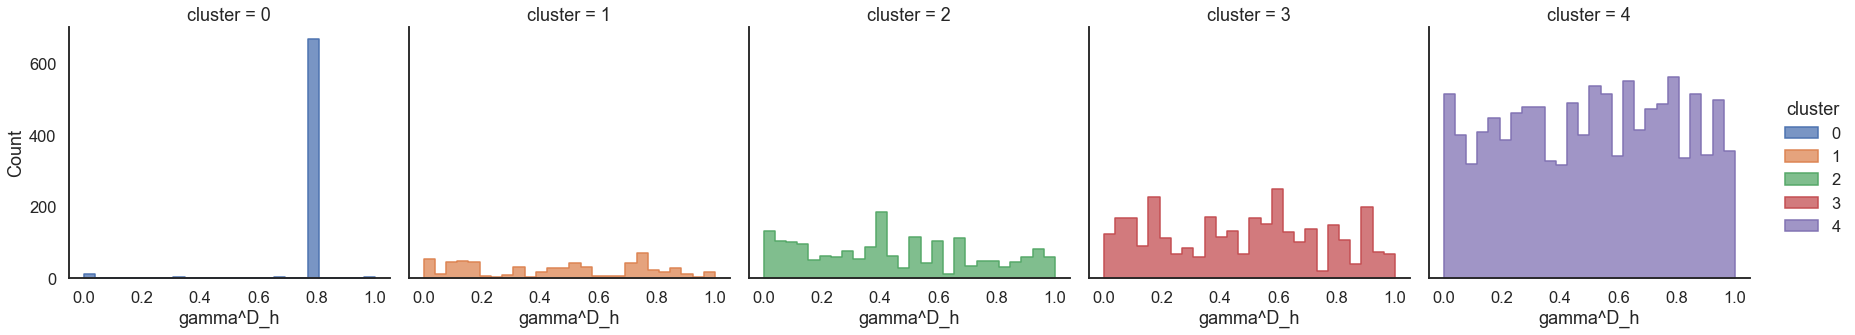

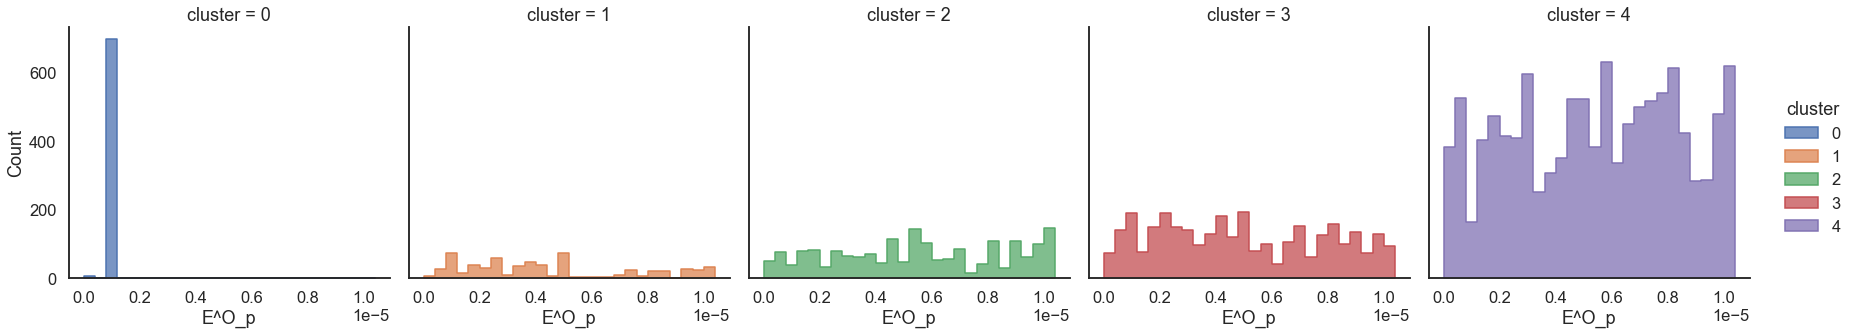

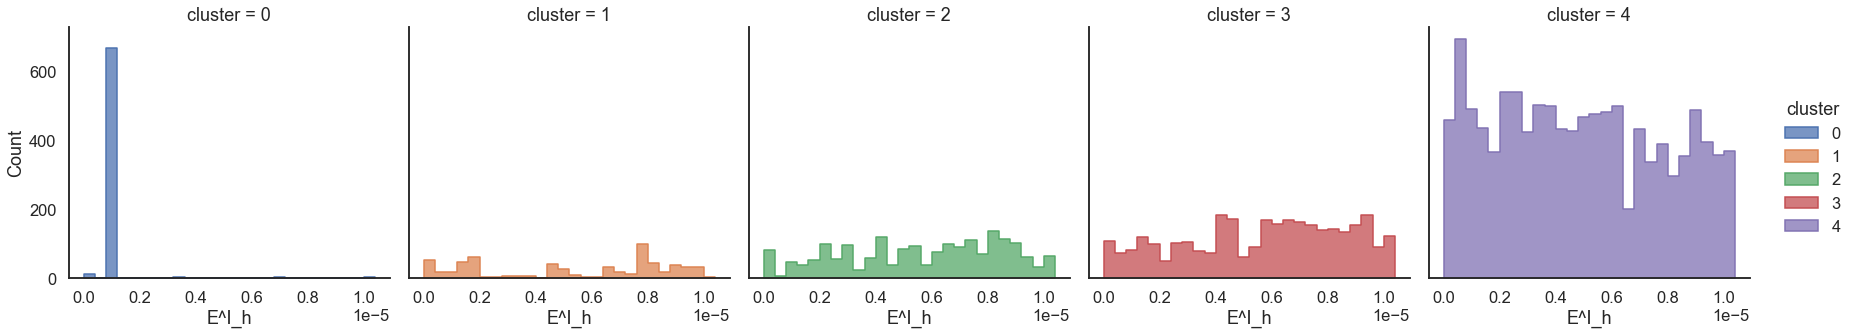

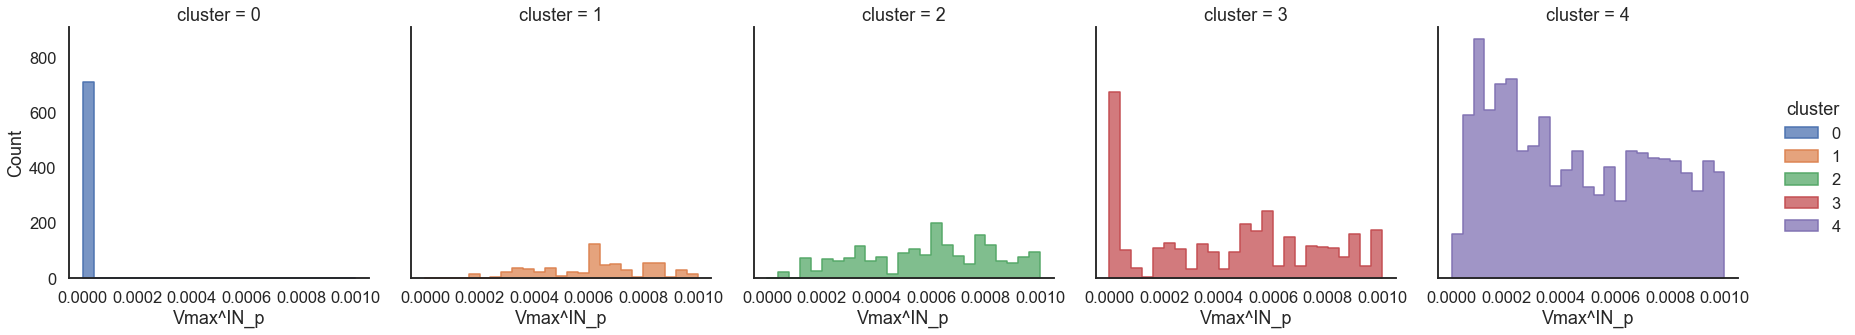

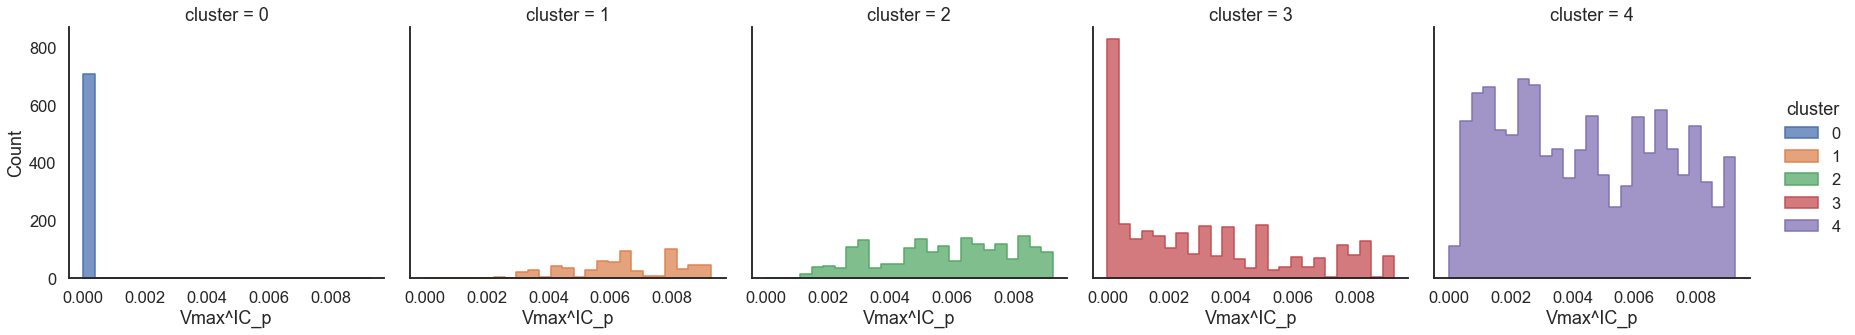

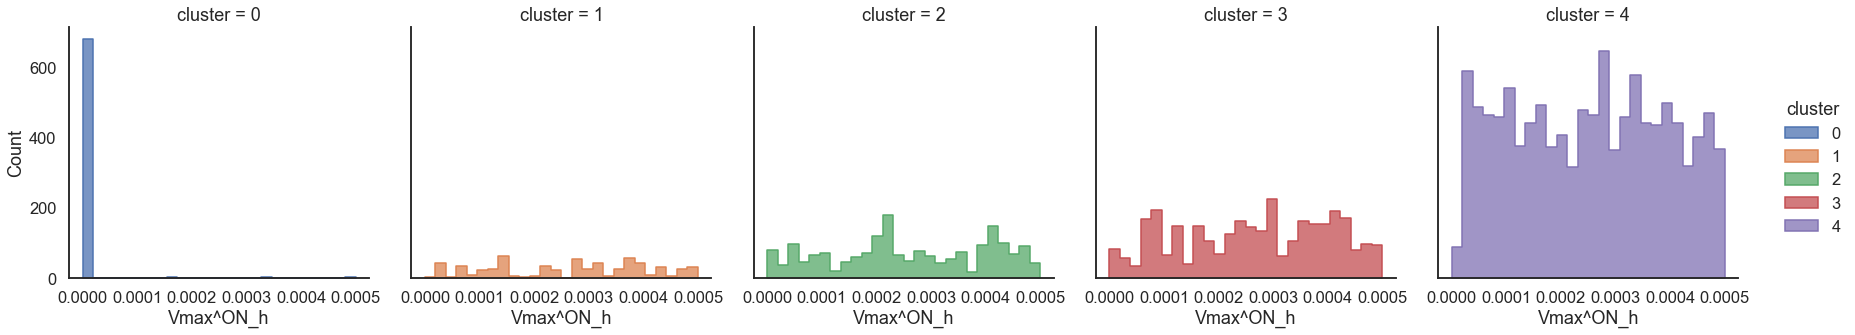

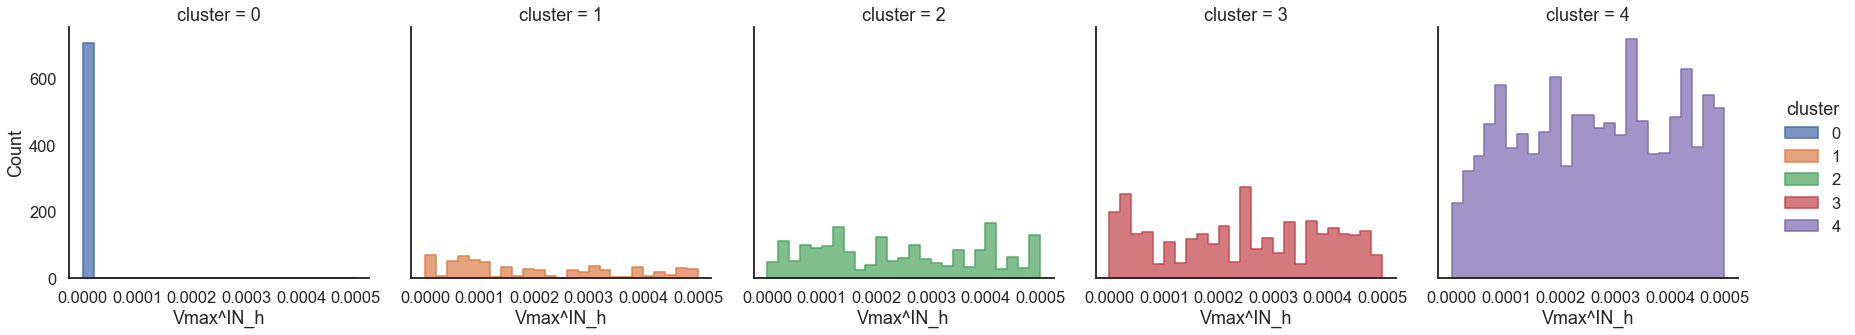

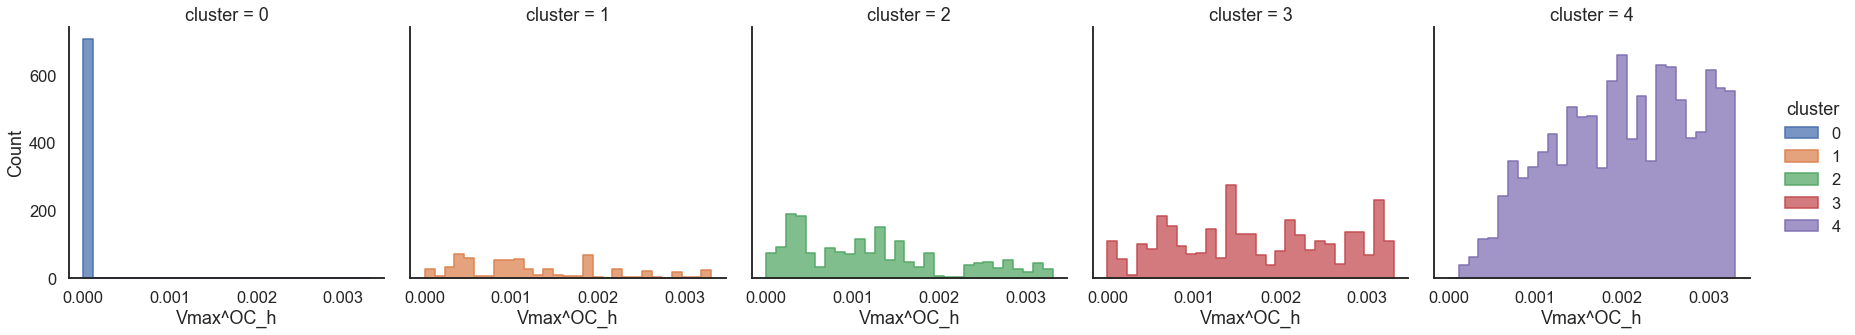

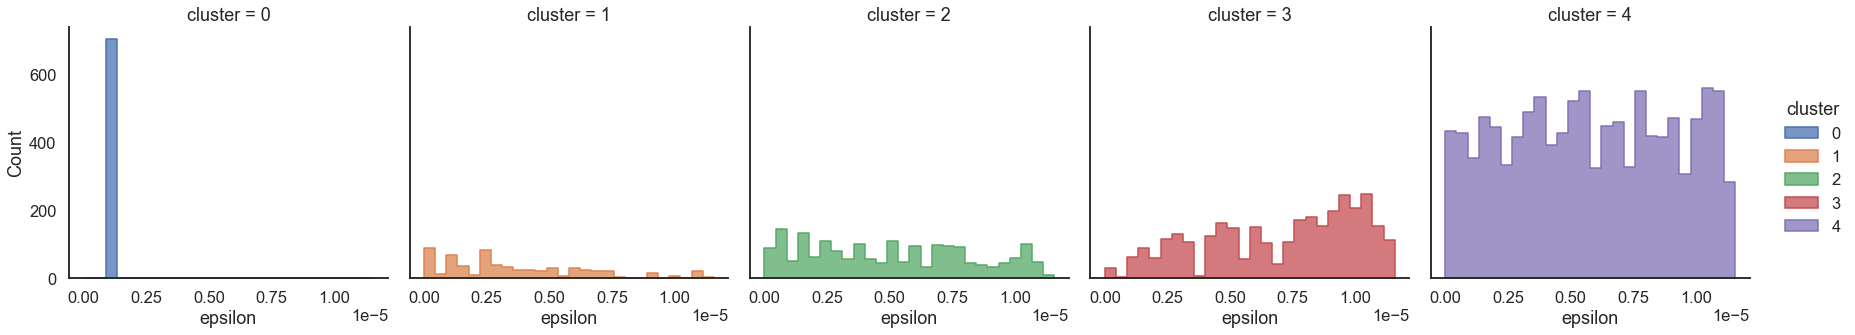

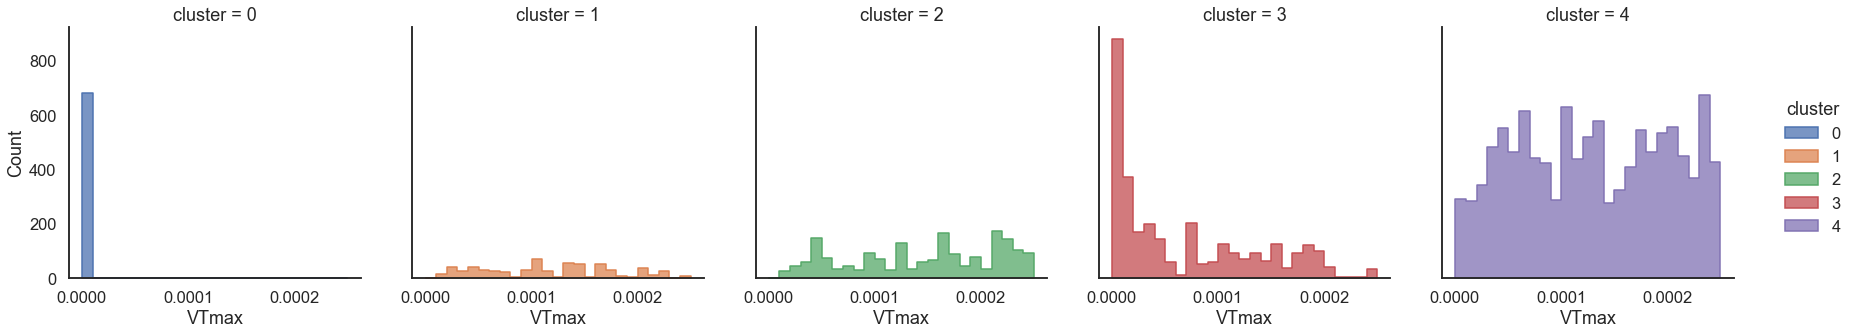

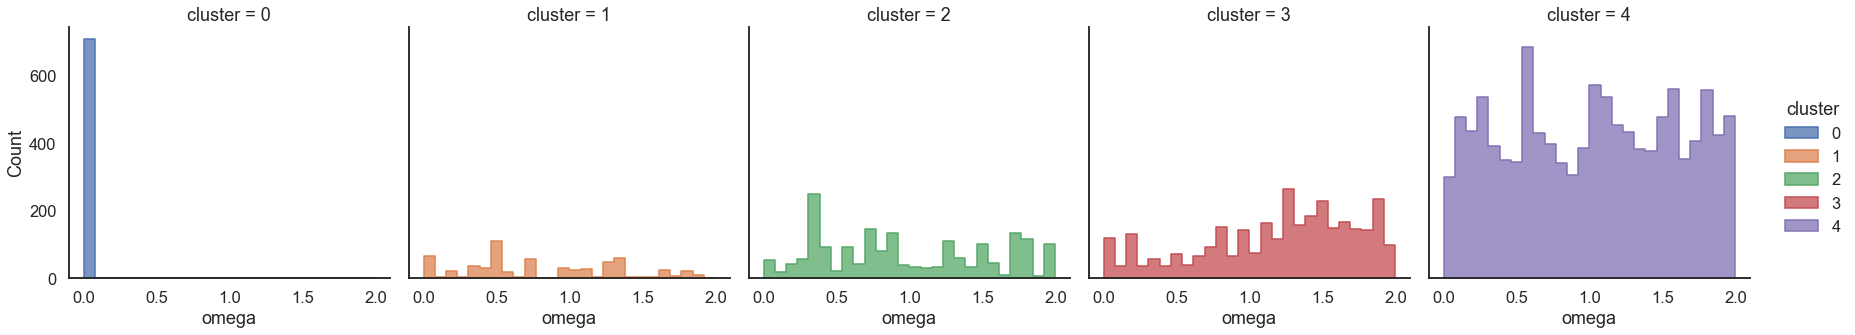

In [49]:
for c in cols_to_lookat:
    sns.displot(data=udf.loc[udf.cluster>=0], 
                x=c, hue='cluster', palette=cpalette[1:], kind='hist', element='step', multiple='stack', col='cluster' )

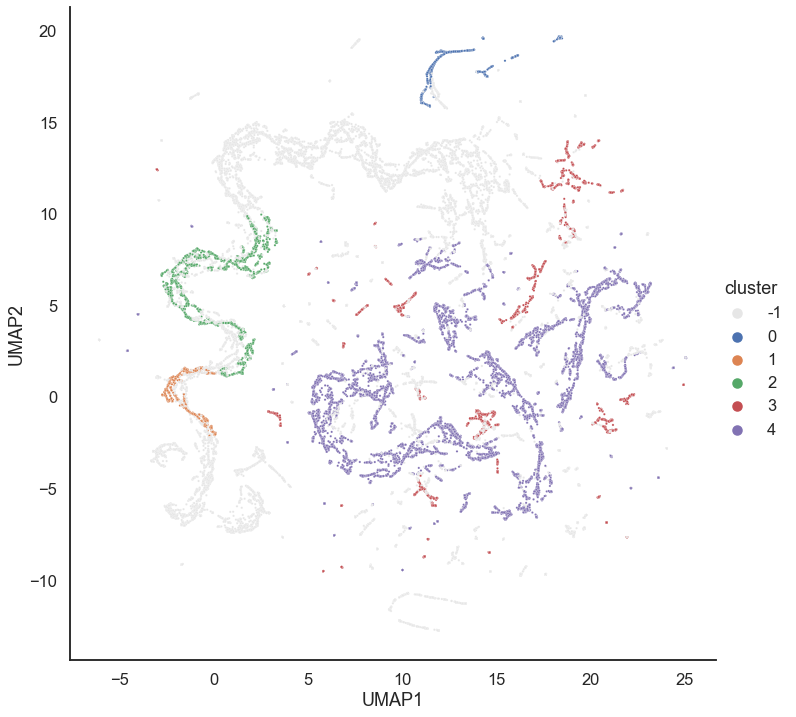

In [50]:
sns.set_context('talk')
cpalette=[(0.9,0.9,0.9),] +sns.color_palette('deep', clusterer.labels_.max()+1)

sns.relplot(data=udf, x='UMAP1', y='UMAP2', hue='cluster', s=5, 
            height=10, aspect=1, palette=cpalette, #size='error',
            legend='full')